In [1]:
import matplotlib.pyplot as plt
import math, cmath
import numpy as np

# Simulation Parameters
e0 = 1        
mu0 = 1       
c0 = 1 / math.sqrt(e0 * mu0) 
dx = 0.5e-3 
dy = 0.5e-3 
magic_time_step = dx / (np.sqrt(2) * c0)
max_time_steps = 500

# Grid in cell units
whole_grid = 100e-3 # whole grid = 30 mm
numX_cells = int(whole_grid / dx)  
numY_cells = int(whole_grid / dy)   
center_x = numX_cells // 2
center_y = numY_cells // 2

# Set up the permittivity grid 
grid = np.ones((numY_cells, numX_cells)) * e0

# Source locations
dipole_spacing_cells = int(15e-3 / dx) # cells between dipoles
x1_source = center_x - (dipole_spacing_cells //2)
x2_source = center_x + (dipole_spacing_cells//2)
y1_source = center_y
y2_source = center_y

# Source parameters
lambda0 = 6e-2 # wavelength for 5G is 6 cm
lambda_lower = 5e-2
lambda_upper = 7e-2
omega0 = (2 * np.pi * c0) / lambda0
sigma = (2 / omega0) * (lambda0 / (lambda_upper - lambda_lower))

# Arrays to store fields
Ez = np.zeros((numX_cells, numY_cells))
Hx = np.zeros((numX_cells, numY_cells))
Hy = np.zeros((numX_cells, numY_cells))

In [2]:
# Dipole Simulation

e_dipole = 100 # permitivity of copper is close to infinity
dipole_width = 1e-3 # dipole thickness = 1 mm
dipole_height = 15e-3 # dipole height = 15 mm
dipole_width_cells = int(dipole_width / dx)         
dipole_height_cells = int(dipole_height / dy)  

# Dipole locations
dipole1_center = x1_source
dipole1_left = dipole1_center - (dipole_width_cells // 2)
dipole1_right = dipole1_left + dipole_width_cells - 1
dipole1_bottom = center_y - (dipole_height_cells // 2)
dipole1_top = dipole1_bottom + dipole_height_cells - 1

dipole2_center = x2_source
dipole2_left = dipole2_center - (dipole_width_cells // 2)
dipole2_right = dipole2_left + dipole_width_cells - 1
dipole2_bottom = center_y - (dipole_height_cells // 2)
dipole2_top = dipole2_bottom + dipole_height_cells - 1

# Place left dipole in permittivity grid
for x in range(dipole1_left, dipole1_right + 1):
    for y in range(dipole1_bottom, dipole1_top + 1):
        grid[y, x] = e_dipole

# Place right dipole in permittivity grid
for x in range(dipole2_left, dipole2_right + 1):
    for y in range(dipole2_bottom, dipole2_top + 1):
        grid[y, x] = e_dipole

In [3]:
# Compute phasor E and M fields on closed contour boundary

#defining square boundary form L1 --> L4
line_size=80e-3 #each line is 80mm
numL_cells=int(line_size // dx)

L_starting_dim= 10e-3 #starting index for L2, L4
L_starting_cell_idx = int(L_starting_dim //dx)
L_ending_dim=90e-3
L_ending_cell_idx=L_starting_cell_idx + numL_cells

#L1 is vertical, RHS line
L1_col1 = np.full(numL_cells, L_ending_cell_idx)
L1_col2=np.arange(L_starting_cell_idx, L_ending_cell_idx)

L1_idxs = np.column_stack((L1_col1,L1_col2))

#L2 is vertical, LHS line
L2_col1=np.full(numL_cells,L_starting_cell_idx)
L2_col2=np.arange(L_starting_cell_idx, L_ending_cell_idx)
L2_idxs=np.column_stack((L2_col1,L2_col2))

#L3 is horizontal, top line
L3_col1=np.arange(L_starting_cell_idx, L_ending_cell_idx)
L3_col2=np.full(numL_cells, L_ending_cell_idx)
L3_idxs=np.column_stack((L3_col1,L3_col2))

#L4 is horizontal, bottom line
L4_col1=np.arange(L_starting_cell_idx, L_ending_cell_idx)
L4_col2=np.full(numL_cells, L_starting_cell_idx)
L4_idxs=np.column_stack((L4_col1,L4_col2))

#print(L1_idxs)

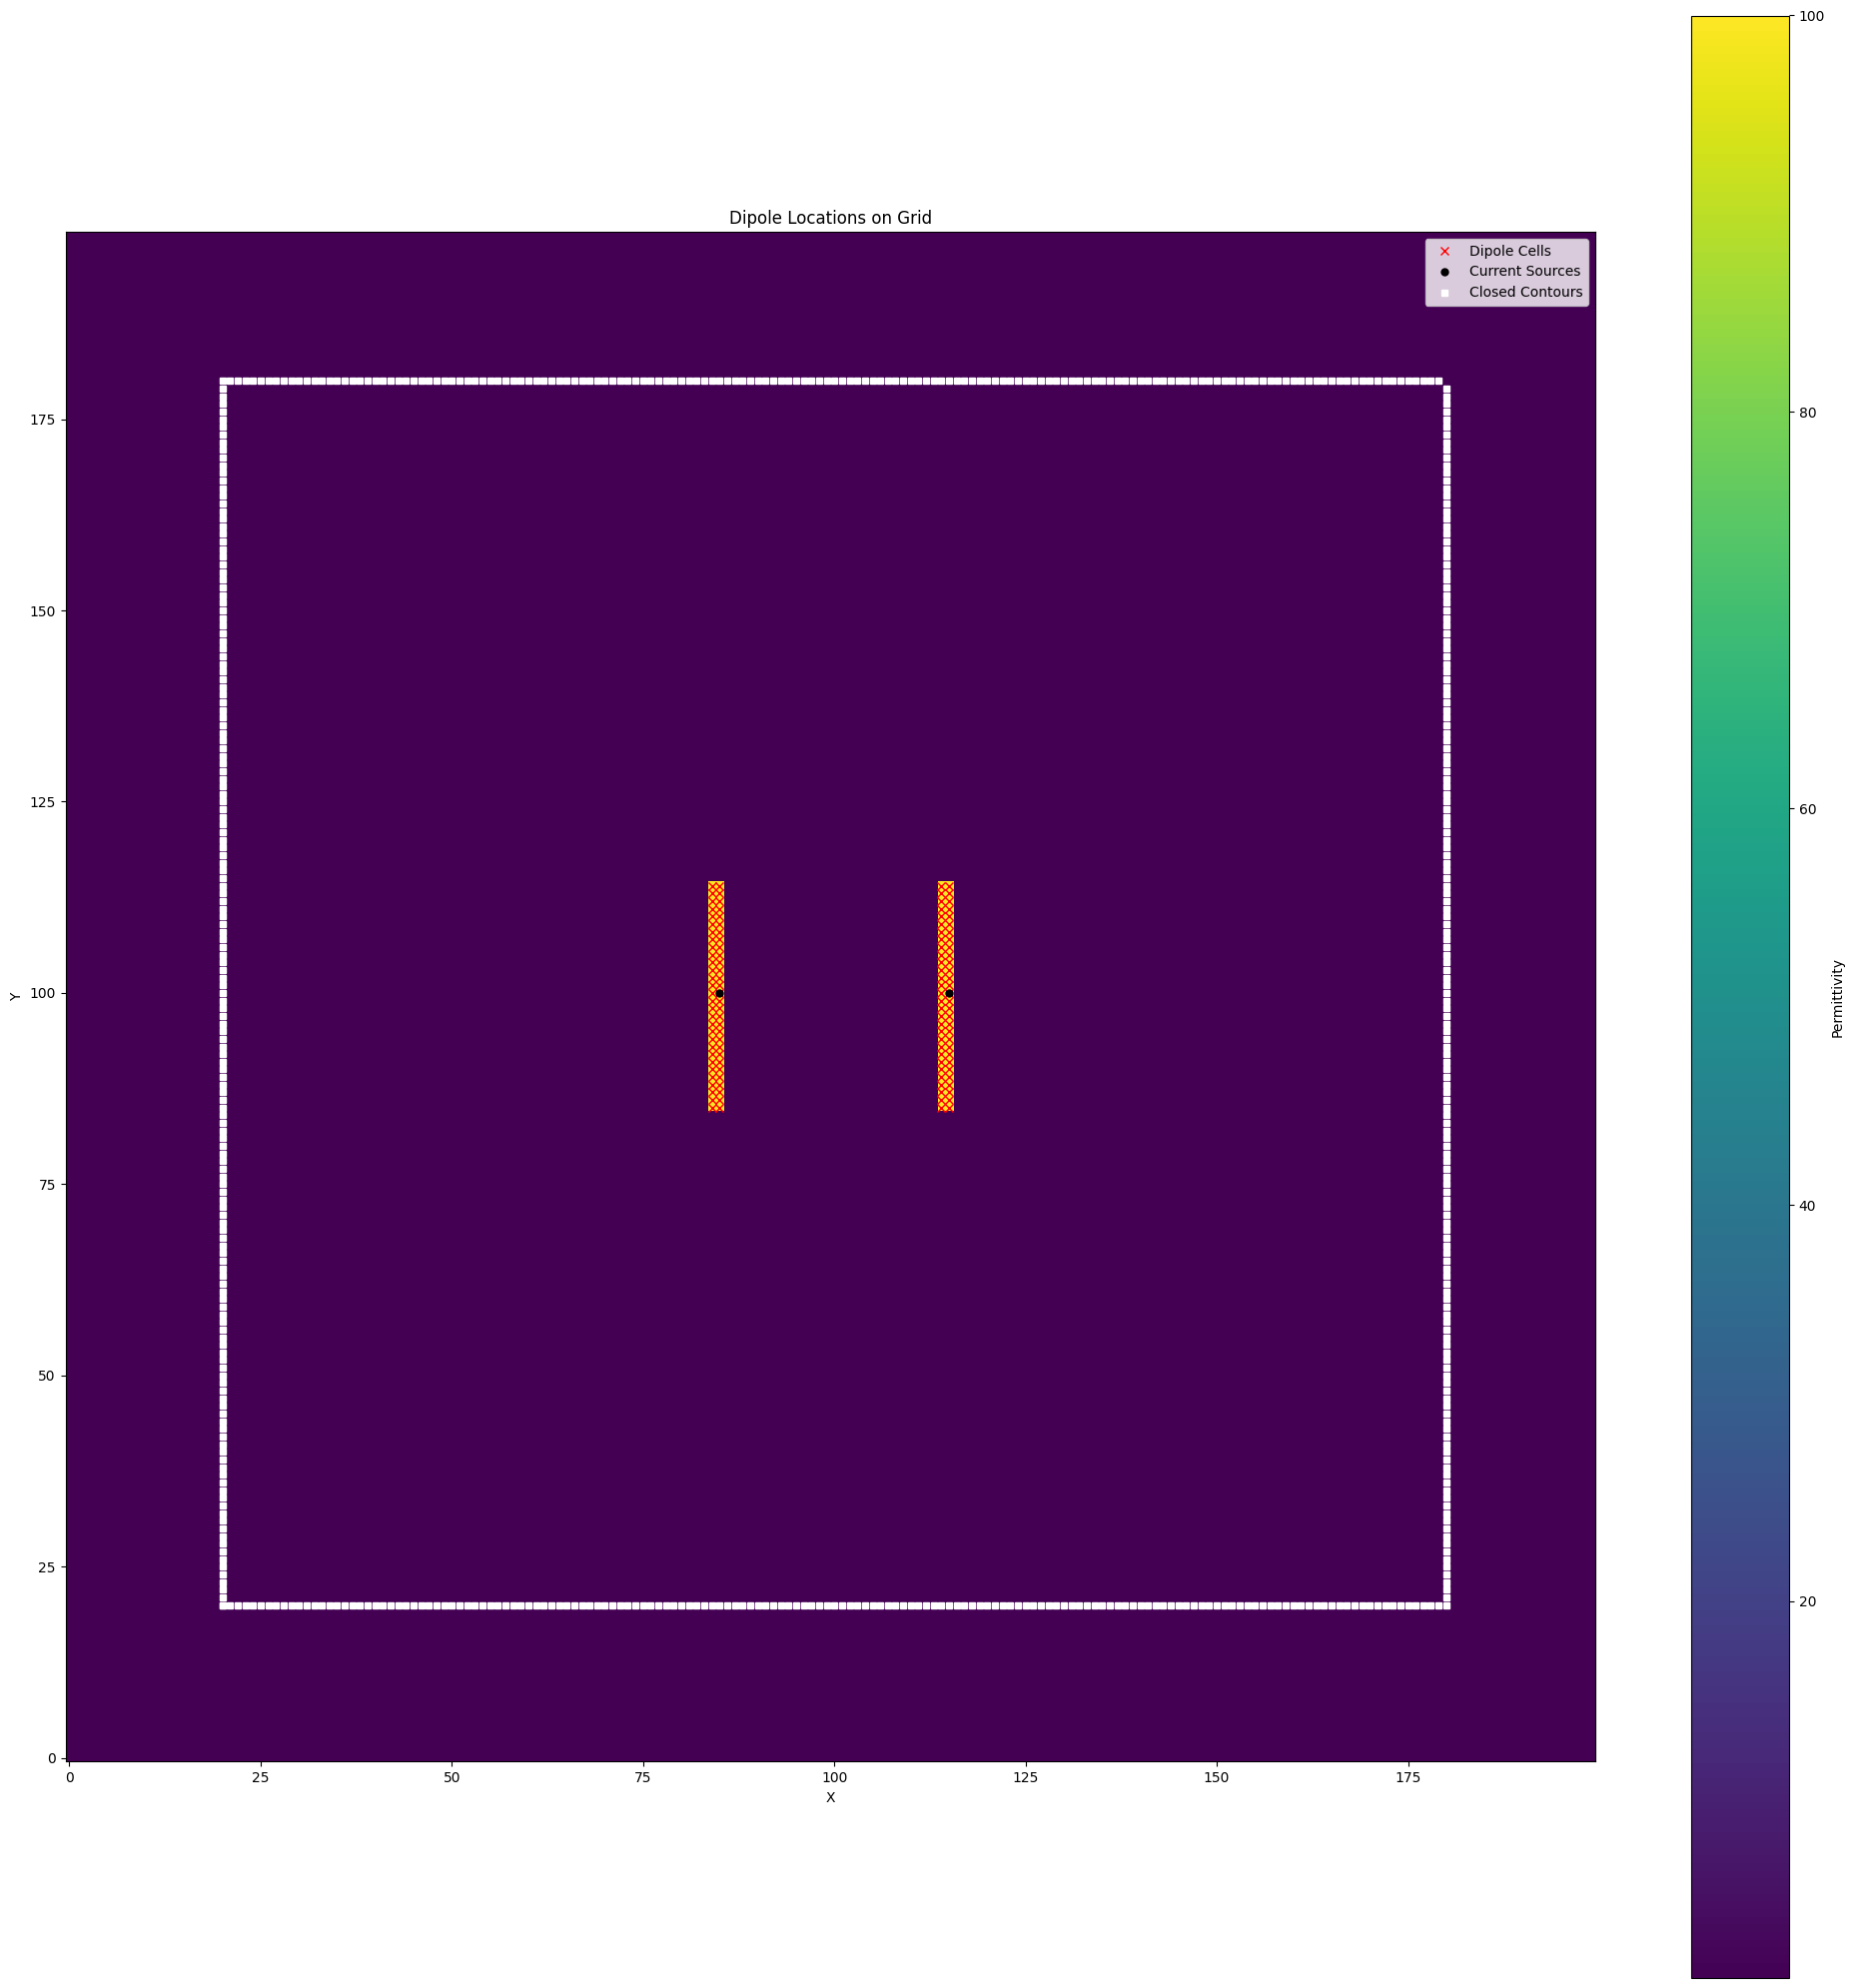

In [4]:
# Visualize grid setup to verify locations of everything

plt.figure(figsize=(20, 20))

# Plot the permittivity grid
plt.imshow(grid, cmap='viridis', origin= 'lower')
plt.colorbar(label='Permittivity')
plt.title('Dipole Locations on Grid')
plt.xlabel('X')
plt.ylabel('Y')

# Mark where the left dipole cells are with a 'x'.
for x in range(dipole1_left, dipole1_right + 1):
    for y in range(dipole1_bottom, dipole1_top + 1):
            plt.plot(x, y, 'x', color='red')

# Mark where the right dipole cells are with a 'x'.
for x in range(dipole2_left, dipole2_right + 1):
    for y in range(dipole2_bottom, dipole2_top + 1):
            plt.plot(x, y, 'x', color='red')

# Mark where the left current source is with a 'o'.
plt.plot(x1_source, y1_source, 'o', markersize = 5, color = 'black')

# Mark where the right current source is with a 'o'.
plt.plot(x2_source, y2_source, 'o', markersize = 5, color = 'black')

# had to add empty plots to get legend
plt.plot([], [], 'x', color='red', label="Dipole Cells")
plt.plot([], [], 'o', markersize=5, color='black', label="Current Sources")
plt.plot([], [], 's', markersize=5, color='white', label="Closed Contours")
plt.legend(loc='upper right')
plt.tight_layout()

#Adding (x,y) pairs from L1, shown as white
all_line_idx=[L1_idxs,L2_idxs,L3_idxs,L4_idxs]
for j in all_line_idx:
    for x, y in j:
        plt.plot(x,y, 's',markersize=4,color='white')
      
plt.show()

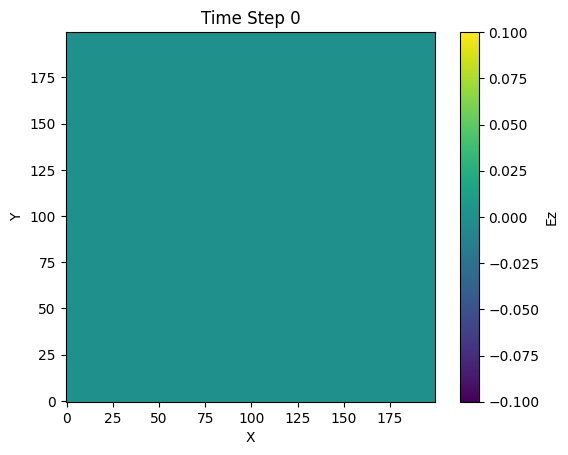

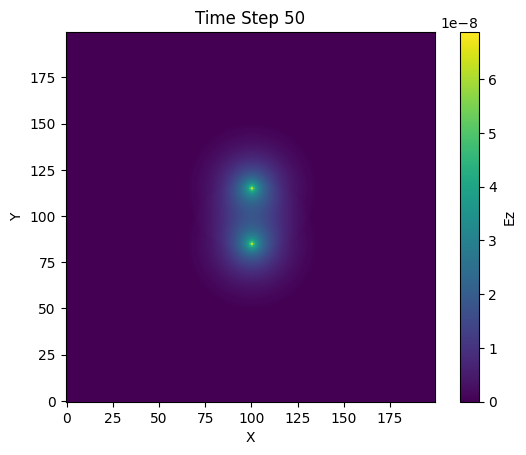

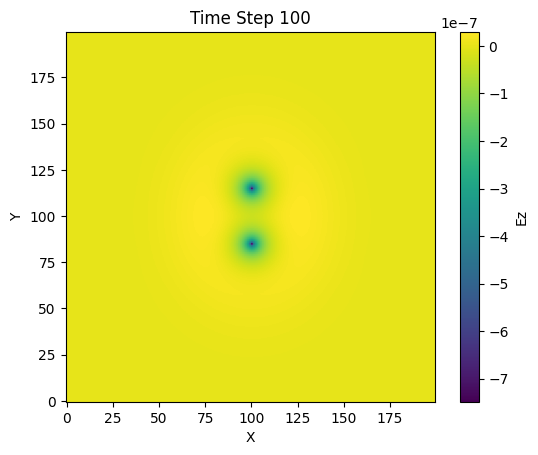

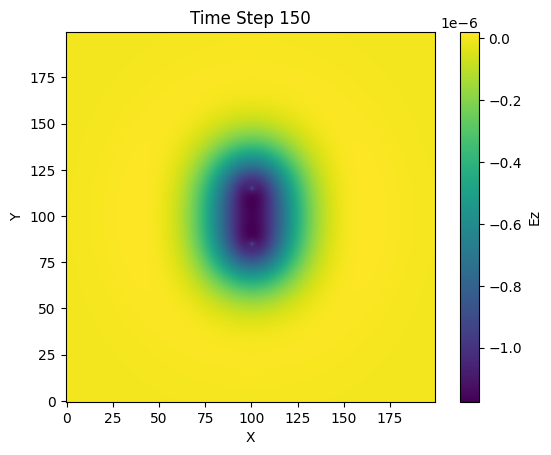

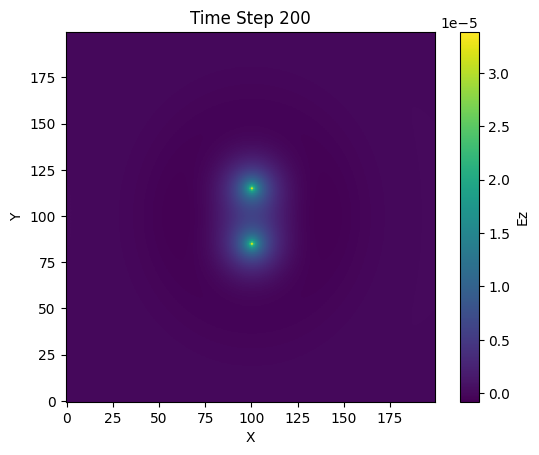

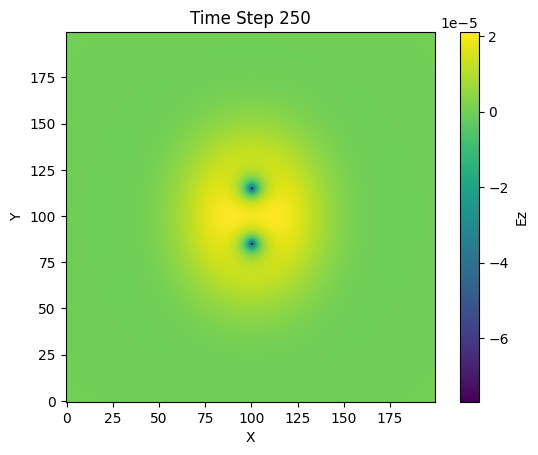

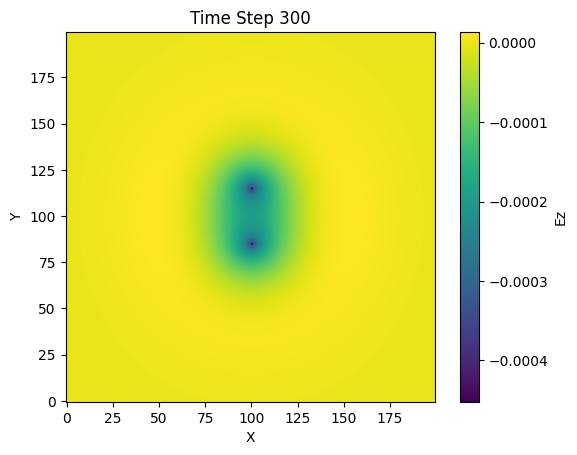

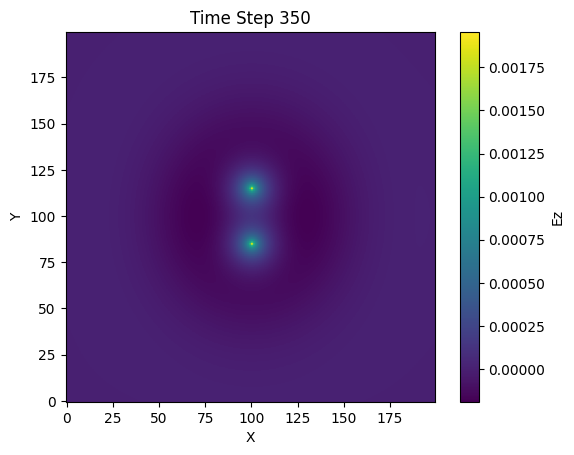

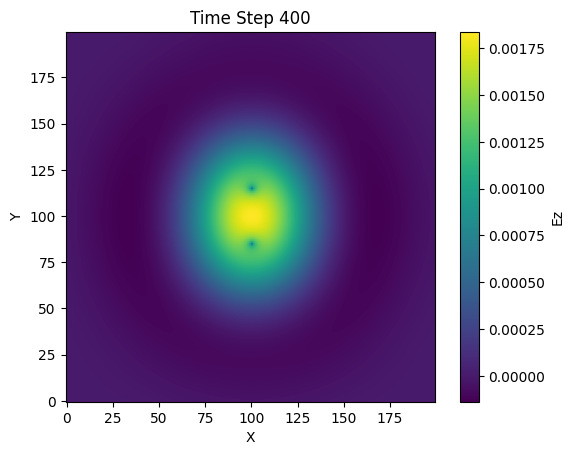

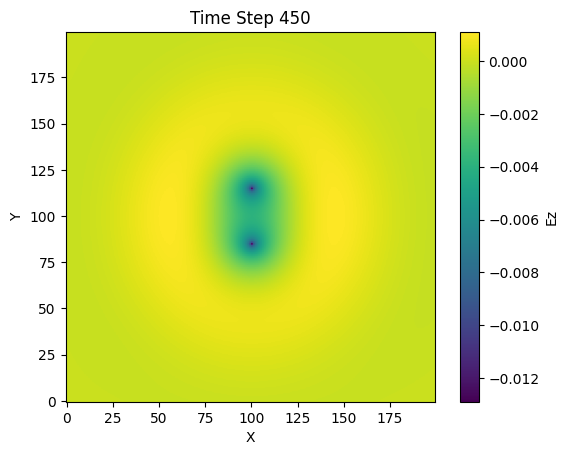

[[0.         0.         0.         ... 0.00019042 0.00020354 0.00021685]
 [0.         0.         0.         ... 0.00020456 0.00021798 0.00023158]
 [0.         0.         0.         ... 0.00021886 0.00023256 0.00024642]
 ...
 [0.         0.         0.         ... 0.00020557 0.00021924 0.00023311]
 [0.         0.         0.         ... 0.00019073 0.00020421 0.0002179 ]
 [0.         0.         0.         ... 0.00017611 0.00018937 0.00020286]]


In [5]:
# 2D FDTD Model

# Using absorbing boundary condition to simulate the energy being absorbed in air.
boundaryLeft = np.zeros(numY_cells)
boundaryRight = np.zeros(numY_cells)
boundaryBottom = np.zeros(numX_cells)
boundaryTop = np.zeros(numX_cells)

#defining Ez_time_L1
Ez_time_L1 = np.zeros((numL_cells, max_time_steps))
Hx_time_L1 = np.zeros((numL_cells, max_time_steps))
Hy_time_L1 = np.zeros((numL_cells, max_time_steps))

#defining L2
Ez_time_L2 = np.zeros((numL_cells, max_time_steps))
Hx_time_L2 = np.zeros((numL_cells, max_time_steps))
Hy_time_L2 = np.zeros((numL_cells, max_time_steps))

#defining L3
Ez_time_L3 = np.zeros((numL_cells, max_time_steps))
Hx_time_L3 = np.zeros((numL_cells, max_time_steps))
Hy_time_L3 = np.zeros((numL_cells, max_time_steps))

#defining L4
Ez_time_L4 = np.zeros((numL_cells, max_time_steps))
Hx_time_L4 = np.zeros((numL_cells, max_time_steps))
Hy_time_L4 = np.zeros((numL_cells, max_time_steps))

#combining time domain into lists
L_idxs_list = [L1_idxs, L2_idxs, L3_idxs, L4_idxs]
Ez_time_list = [Ez_time_L1, Ez_time_L2, Ez_time_L3, Ez_time_L4]
Hx_time_list = [Hx_time_L1, Hx_time_L2, Hx_time_L3, Hx_time_L4]
Hy_time_list = [Hy_time_L1, Hy_time_L2, Hy_time_L3, Hy_time_L4]

# Main 2D FDTD Loop
for n in range(max_time_steps):

    # Compute Hy 
    for i in range(numX_cells - 1):
        for j in range(numY_cells):
            Hy[i, j] += (Ez[i + 1, j] - Ez[i, j]) * magic_time_step / dx
            for k in range(4):
                match = np.any((L_idxs_list[k][:, 0] == i) & (L_idxs_list[k][:, 1] == j))
                if match:
                    idx = np.where((L_idxs_list[k][:, 0] == i) & (L_idxs_list[k][:, 1] == j))[0]
                    Hy_time_list[k][idx, n] = Hy[i, j]



     # Compute Hx
    for i in range(numX_cells):
        for j in range(numY_cells - 1):
            Hx[i, j] -= (Ez[i, j + 1] - Ez[i, j]) * magic_time_step / dy
            for k in range(4):
                match = np.any((L_idxs_list[k][:, 0] == i) & (L_idxs_list[k][:, 1] == j))
                if match:
                    idx = np.where((L_idxs_list[k][:, 0] == i) & (L_idxs_list[k][:, 1] == j))[0]
                    Hx_time_list[k][idx, n] = Hx[i, j]


    # Use temp variables to store left and bottom Ez values sorta like a moving window; only 2 sides needed bc symmetrical
    tempLeft = Ez[1, :].copy() 
    tempBottom = Ez[:, 1].copy()  

    # Compute Ez
    for i in range(1, numX_cells - 1):
        for j in range(1, numY_cells - 1):
            Ez[i, j] += ((Hy[i, j] - Hy[i - 1, j]) * magic_time_step / dx) - ((Hx[i, j] - Hx[i, j - 1]) * magic_time_step / dy)

            #recording Ez at L1
            for k in range(4):
                match = np.any((L_idxs_list[k][:, 0] == i) & (L_idxs_list[k][:, 1] == j))
                if match:
                    idx = np.where((L_idxs_list[k][:, 0] == i) & (L_idxs_list[k][:, 1] == j))[0]
                    Ez_time_list[k][idx, n] = Ez[i, j]


            
    # Apply excitation at left source
    t_n = n * magic_time_step
    Ez[x1_source, y1_source] += np.exp(-((t_n - 4 * sigma) ** 2) / sigma ** 2) * np.sin(omega0 * t_n)

    # Apply excitation at right source
    t_n = n * magic_time_step
    Ez[x2_source, y2_source] += np.exp(-((t_n - 4 * sigma) ** 2) / sigma ** 2) * np.sin(omega0 * t_n)

    # Update PEC conditions
    Ez[0, :] = boundaryLeft
    Ez[-1, :] = boundaryRight
    Ez[:, 0] = boundaryBottom
    Ez[:, -1] = boundaryTop

    # Update boundary buffers for next time step
    boundaryLeft = tempLeft
    boundaryBottom = tempBottom
    boundaryRight = Ez[-2, :].copy()
    boundaryTop   = Ez[:, -2].copy()
    
    # Visualize Ez field every 50 time steps
    if n % 50 == 0:
        plt.clf() 
        plt.imshow(Ez, cmap='viridis', origin='lower')
        plt.title(f"Time Step {n}")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.colorbar(label="Ez")
        plt.pause(0.01) 

print(Ez_time_L1)
plt.show()

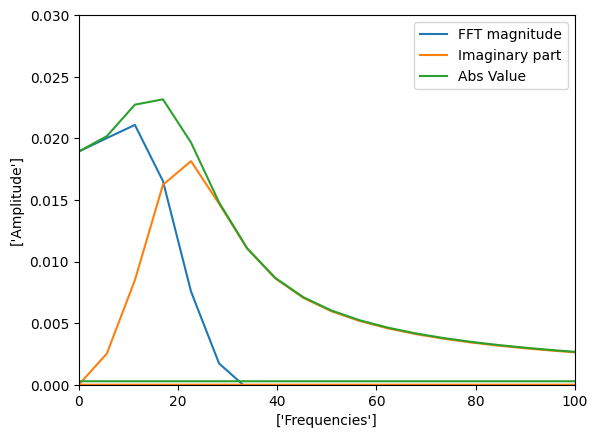

(500,)


In [18]:
#perform DFT on each row in Ez_time_L1 matrix

#Ez_fft= np.zeros(numL_cells, max_time_steps)

#taking fft of each spatial element
Ez_t_list = [Ez_time_L1, Ez_time_L2, Ez_time_L3, Ez_time_L4]

Ez_fft_vals = [np.fft.fft(Ez_time, axis=1) for Ez_time in Ez_t_list]
Ez_freqs = [np.fft.fftfreq(max_time_steps, d=magic_time_step) for _ in Ez_t_list]


#sample plot:
plt.figure()
plt.plot(Ez_freqs[0],np.real(Ez_fft_vals[0][50]),label='FFT magnitude')
plt.plot(Ez_freqs[0], np.imag(Ez_fft_vals[0][50]), label='Imaginary part')
plt.plot(Ez_freqs[0], np.abs(Ez_fft_vals[0][50]), label='Abs Value')

plt.xlim([0,100])
plt.ylim([0,0.03])
plt.xlabel(['Frequencies'])
plt.ylabel(['Amplitude'])
plt.legend()
plt.show()

#Hx_L1_fft_vals=np.fft.fft(Hx_time_L1, axis=1)
#Hx_L1_freqs=np.fft.fftfreq(max_time_steps, d = magic_time_step)
Hx_t_list = [Hx_time_L1, Hx_time_L2, Hx_time_L3, Hx_time_L4]

Hx_fft_vals = [np.fft.fft(Hx_time, axis=1) for Hx_time in Hx_t_list]
Hx_freqs = [np.fft.fftfreq(max_time_steps, d=magic_time_step) for _ in Hx_t_list]

#Hy_L1_fft_vals=np.fft.fft(Hy_time_L1, axis=1)
#Hy_L1_freqs=np.fft.fftfreq(max_time_steps, d = magic_time_step)
Hy_t_list = [Hy_time_L1, Hy_time_L2, Hy_time_L3, Hy_time_L4]

Hy_fft_vals = [np.fft.fft(Hy_time, axis=1) for Hy_time in Hy_t_list]
Hy_freqs = [np.fft.fftfreq(max_time_steps, d=magic_time_step) for _ in Hy_t_list]

#print(Ez_fft_vals[0].shape)
print(Ez_fft_vals[0][50].shape)

In [ ]:
#compute Jeq and Meq

#along L1, Meq = Ez(phasor)

#first: extract phasor element at 16.66 MHz

#ensuring that max freq component is at same bin for all lines
for freqs_arr in Ez_freqs:

    target_freq= omega0/(2*np.pi)
    bin_idx = np.argmin(np.abs(freqs_arr - target_freq))
    print('Bin index is ',bin_idx)


Meq_L1_phasors = Ez_fft_vals[0][:,bin_idx]
Meq_L2_phasors = -Ez_fft_vals[1][:,bin_idx]
Meq_L3_phasors = -Ez_fft_vals[2][:,bin_idx]
Meq_L4_phasors= Ez_fft_vals[3][:,bin_idx]

Jeq_L1_phasors=Hy_fft_vals[0][:,bin_idx]
Jeq_L2_phasors=-Hy_fft_vals[1][:,bin_idx]
Jeq_L3_phasors=-Hx_fft_vals[2][:,bin_idx]
Jeq_L4_phasors=Hx_fft_vals[3][:,bin_idx]

#creating list for all Jeq and Meq components along grid
#print(Meq_L1_phasors)

Bin index is  3
Bin index is  3
Bin index is  3
Bin index is  3


In [ ]:
#identifying integral variables for E field in far field:

#defining r_bar position in far field:
r_bar_x = 1000e-3 # x distance from center is 1000mm away: 1 m away
r_bar_y = 1000e-3
r_bar_x_y=np.array([r_bar_x,r_bar_y])
center_sim_x_y=np.array([center_x,center_y])
r_hat_dot_r_prime_bar=np.zeros(numL_cells)

#define unit vector r hat from given r bar positions
r_bar_magnitude= np.linalg.norm(r_bar_x_y - center_sim_x_y)
print(r_bar_magnitude)

r_hat_x_y=np.array([r_bar_x/r_bar_magnitude , r_bar_y/r_bar_magnitude])

#near field source point vector
r_bar_prime_x=(np.linspace(L_ending_dim,L_ending_dim,numL_cells)) - (center_x*dx)
r_bar_prime_y=(np.linspace(L_starting_dim,L_ending_dim,numL_cells)) - (center_y*dy)
r_bar_prime_x_y=np.array([r_bar_prime_x,r_bar_prime_y])

r_hat_dot_r_prime_bar=np.dot(r_hat_x_y,r_bar_prime_x_y)
#print(r_hat_dot_r_prime_bar)                    


In [ ]:
#computing closed contour integral over L1 of Jeq and Meq
#defining wavenumber k
k = 2 * np.pi / lambda0
L1_integral = 0+0j
L1_integral_arr = ( (omega0 * mu0 * np.sum(Jeq_L1_phasors[0:-1])) - (k*Meq_L1_phasors[0:-1]) ) *np.exp(1j * k *r_hat_dot_r_prime_bar[0:-1])

L1_integral_val=np.sum(L1_integral_arr)
#print(L1_integral_arr)
#print(L1_integral_val)


In [ ]:
#Solving for scattering width
L1_integral_squared=L1_integral_val**2



In [ ]:
#including outside constants
r=r_bar_magnitude
far_field_integral_const= (np.exp(-1j*k*r) / math.sqrt(r) ) * ( (np.exp(np.pi * 1j / 4)) / math.sqrt(8*np.pi*k) )

Ez_far_field = far_field_integral_const * L1_integral_val
print(Ez_far_field)

In [ ]:
#Above code deals with calcualting E in far field for only one point in space.
#To better visualize far field effects, need to evaluate Ez in far field across some line.

#copying from existing code block, looping to create matrix of e^jkr hat r bar prime factors
#defining r_bar position in far field: 

#This implementation is incorrect. First, we do not want to implement for some point r at some fixed distance, because we want to take distance to infinity.
#therefore, calculate scattering width, which computes power radiated within a theta cross section
#should be plotted as a function of theta

r_bar_x = 1000e-3 # x distance from center is 1000mm away: 1 m away
r_bar_y_min = -1000e-3
r_bar_y_max = 1000e-3
center_sim_x_y=np.array([center_x,center_y])

#far field will be evaluated from, in x,y: 1m, -1m --> 1m, 1m: essentially vertical line to the right of simulation
num_ff_pts=int(abs((r_bar_y_max-r_bar_y_min)/dy))
r_bar_y_min_to_max_arr=np.linspace(r_bar_y_min,r_bar_y_max,num=num_ff_pts)

Ez_far_field_arr=np.zeros(num_ff_pts,dtype=np.complex128)

for i in range (0,num_ff_pts):

    r_bar_x_y=np.array([r_bar_x,r_bar_y_min_to_max_arr[i]])

    r_hat_dot_r_prime_bar=np.zeros(numL_cells)
    
    #calculate magnitude using built in function
    r_bar_magnitude= np.linalg.norm(r_bar_x_y - center_sim_x_y)
    #print(r_bar_magnitude)
    
    #define unit vector r hat from given r bar positions
    r_hat_x_y=np.array([r_bar_x/r_bar_magnitude , r_bar_y_min_to_max_arr[i]/r_bar_magnitude])

    #near field source point vector
    #as of now: only from pts on L1
    r_bar_prime_x=(np.linspace(L_ending_dim,L_ending_dim,numL_cells)) - (center_x*dx)
    r_bar_prime_y=(np.linspace(L_starting_dim,L_ending_dim,numL_cells)) - (center_y*dy)
    r_bar_prime_x_y=np.array([r_bar_prime_x,r_bar_prime_y])


    #element wise dot product from single rbarprime vector (to ff point), and r_hat_x_y points (all points along L1)
    r_hat_dot_r_prime_bar=np.dot(r_hat_x_y,r_bar_prime_x_y)
    #print(r_hat_dot_r_prime_bar)                    

    k = 2 * np.pi / lambda0
    L1_integral = 0+0j
    L1_integral_arr = ( (omega0 * mu0 * np.sum(Jeq_L1_phasors[0:-1])) - (k*Meq_L1_phasors[0:-1]) ) *np.exp(1j * k *r_hat_dot_r_prime_bar[0:-1])

    L1_integral_val=np.sum(L1_integral_arr)

    r=r_bar_magnitude
    far_field_integral_const= (np.exp(-1j*k*r) / math.sqrt(r) ) * ( (np.exp(np.pi * 1j / 4)) / math.sqrt(8*np.pi*k) )

    Ez_far_field_arr[i] = far_field_integral_const * L1_integral_val

print(r_bar_y_min_to_max_arr)
print(Ez_far_field_arr)

#visualizing Ez_far_field_arr


mag=np.abs(Ez_far_field_arr)
phase=np.angle(Ez_far_field_arr)
phase_deg=180*phase/np.pi

fig,ax1=plt.subplots()
ax1.set_xlabel('Position at x=1mm, y= _ mm away from center')
ax1.set_ylabel('Magnitude')
color='tab:blue'
ax1.plot(r_bar_y_min_to_max_arr,mag,color=color)

ax2=ax1.twinx()
ax2.set_ylabel('Phase')
color='tab:red'
ax2.plot(r_bar_y_min_to_max_arr,phase_deg,color=color)
plt.show()  



In [55]:
#Correct implementation

#Computing r' cos (phi) for e^jkr'cosphi component

#Given input parameter phi
#Defining r_prime_cos_phi_vec
r_prime_cos_phi_vec_L1=[]
r_prime_vec_L1=[]
phi_vector_L1=[]

theta_deg = 0 #sample theta val in deg
theta_rad=math.radians(theta_deg)
r_mag_L1=((L_ending_cell_idx-center_x)*dx) / math.cos(theta_rad)
for x, y in L1_idxs:
    x_y_distances=np.array([(x-center_x)*dx,(y-center_y)*dy])
    r_prime_mag=np.linalg.norm(x_y_distances)
    
    theta_prime_rad = math.asin ( ((y-center_y)*dy) / r_prime_mag)
    theta_prime_deg=math.degrees(theta_prime_rad)
    phi=theta_deg-theta_prime_deg

    phi_rad=math.radians(phi)
    phi_vector_L1.append(phi)

    phase_const= r_mag_L1 * math.cos(phi_rad)
    #print(phi_rad)
    #print(r_mag_L1 * math.cos(phi_rad))
    r_prime_cos_phi_vec_L1.append(phase_const)
print('Line 1')
print(phi_vector_L1)
#r_prime_cos_phi_vec=np.array(r_prime_cos_phi_vec_L1)
#print(r_prime_cos_phi_vec_L1)
#repeating similar process for L2
#Difference is that L2 is left line: magnitude starts with L_starting_cell_idx

theta_deg = 180 #sample theta val in deg
theta_rad=math.radians(theta_deg)
r_prime_cos_phi_vec_L2=[]
r_prime_vec_L2=[]
phi_vector_L2=[]
r_mag_L2=abs(((L_starting_cell_idx-center_x)*dx)) / math.cos(theta_rad)

for x, y in L2_idxs:
    x_y_distances=np.array([(x-center_x)*dx,(y-center_y)*dy])
    r_prime_mag=abs(np.linalg.norm(x_y_distances))
    
    theta_prime_rad = math.asin ( ((y-center_y)*dy) / r_prime_mag)
    theta_prime_deg=math.degrees(theta_prime_rad)
    phi=-((theta_deg-180)-theta_prime_deg)

    phi_rad=math.radians(phi)
    phi_vector_L2.append(phi)

    phase_const= r_mag_L2 * math.cos(phi_rad)
    #print(phi_rad)
    #print(r_mag_L2 * math.cos(phi_rad))
    r_prime_cos_phi_vec_L2.append(phase_const)

print("Line 2: ")
print(phi_vector_L2)
#r_prime_cos_phi_vec=np.array(r_prime_cos_phi_vec_L2)
#print(r_prime_cos_phi_vec_L2)
theta_deg = 90 #sample theta val in deg
theta_rad=math.radians(theta_deg)
r_prime_cos_phi_vec_L3=[]
r_prime_vec_L3=[]
phi_vector_L3=[]
r_mag_L3=abs(((L_ending_cell_idx-center_y*dy) / math.sin(theta_rad)))

for x, y in L3_idxs:
    x_y_distances=np.array([(x-center_x)*dx,(y-center_y)*dy])
    r_prime_mag=abs(np.linalg.norm(x_y_distances))
    
    theta_prime_rad = math.acos ( ((x-center_x)*dx) / r_prime_mag)
    theta_prime_deg=math.degrees(theta_prime_rad)
    phi=(180-theta_deg)-theta_prime_deg

    phi_rad=math.radians(phi)
    phi_vector_L3.append(phi)

    phase_const= r_mag_L3 * math.cos(phi_rad)
    #print(phi_rad)
    #print(r_mag_L3 * math.cos(phi_rad))
    r_prime_cos_phi_vec_L3.append(phase_const)

print("Line 3: ")
print(phi_vector_L3)
#r_prime_cos_phi_vec=np.array(r_prime_cos_phi_vec_L2)
#print(r_prime_cos_phi_vec_L2)

theta_deg = 270 #sample theta val in deg
theta_rad=math.radians(theta_deg)
r_prime_cos_phi_vec_L4=[]
r_prime_vec_L4=[]
phi_vector_L4=[]
r_mag_L4=abs(((L_starting_cell_idx-center_y*dy) / math.sin(theta_rad)))

for x, y in L4_idxs:
    x_y_distances=np.array([(x-center_x)*dx,(y-center_y)*dy])
    r_prime_mag=abs(np.linalg.norm(x_y_distances))
    
    theta_prime_rad = math.acos ( ((x-center_x)*dx) / r_prime_mag)
    theta_prime_deg=math.degrees(theta_prime_rad)
    phi=-((theta_deg-180)-theta_prime_deg)

    phi_rad=math.radians(phi)
    phi_vector_L4.append(phi)

    phase_const= r_mag_L4 * math.cos(phi_rad)
    #print(phi_rad)
    #print(r_mag_L3 * math.cos(phi_rad))
    r_prime_cos_phi_vec_L4.append(phase_const)

print("Line 4: ")
print(phi_vector_L4)
#r_prime_cos_phi_vec=np.array(r_prime_cos_phi_vec_L2)
#print(r_prime_cos_phi_vec_L4)


Line 1
[45.00000000000001, 44.639653936612774, 44.27477570094075, 43.90530940814697, 43.53119928561418, 43.1523897340054, 42.768825391968754, 42.380451204605315, 41.987212495816664, 41.58905504464428, 41.18592516570965, 40.77776979385732, 40.36453657309736, 39.94617394993564, 39.52263127117113, 39.0938588862295, 38.65980825409009, 38.22043205485005, 37.77568430595466, 37.32552048310607, 36.86989764584402, 36.408774567772355, 35.942111871382345, 35.469872167400055, 34.992020198558656, 34.5085229876684, 34.019349989826466, 33.52447324857696, 33.02386755579664, 32.517510615045516, 32.005383208083494, 31.487469364213986, 30.96375653207353, 30.43423575344341, 29.898901838614567, 29.35775354279127, 28.810793742973058, 28.25802961470689, 27.699472808055, 27.135139622076878, 26.56505117707799, 25.98923358383301, 25.407718108948472, 24.82054133548908, 24.22774531795417, 23.62937773065682, 23.025492008528037, 22.41614747934364, 21.801409486351815, 21.181349500266236, 20.556045219583464, 19.92558

In [58]:
#computing closed contour integral over L1 of Jeq and Meq
#defining wavenumber k
r_prime_cos_phi_vec_L1=np.array(r_prime_cos_phi_vec_L1)
k = 2 * np.pi / lambda0
L1_integral = 0+0j
L1_integral_arr = ( (omega0 * mu0 * np.sum(Jeq_L1_phasors[0:-1])) - (k*Meq_L1_phasors[0:-1]) ) * np.exp(1j * k *r_prime_cos_phi_vec_L1[0:-1])

L1_integral_val=np.sum(L1_integral_arr)

L1_integral_val_squared=L1_integral_val**2

E_initial_amplitude=1
lambda_val=lambda0
sigma_2d=(lambda_val / (8*np.pi*(E_initial_amplitude**2))) * L1_integral_val_squared
print(sigma_2d)
#print(L1_integral_arr)
#print(L1_integral_val)


(-3327494.258118995+2313673.5129906936j)


In [ ]:
#Looping through multiple theta input parameters
theta_input_param=np.linspace(0,360,361)
#print(theta_input_param)
r_prime_cos_phi_vec=[]
sigma_2d=np.zeros(361)
k = 2 * np.pi / lambda0
for theta in theta_input_param:
    theta_deg = theta
    theta_rad=math.radians(theta_deg)
    r_mag=((L_ending_cell_idx-center_x)*dx) / math.cos(theta_rad)
    r_prime_cos_phi_vec=[]
    for x, y in L1_idxs:
        x_y_distances=np.array([(x-center_x)*dx,(y-center_y)*dy])
        r_prime_mag=np.linalg.norm(x_y_distances)
        
        theta_prime_rad = math.asin ( ((y-center_y)*dy) / r_prime_mag)
        theta_prime_deg=math.degrees(theta_prime_rad)
        phi=theta_deg-theta_prime_deg

        phi_rad=math.radians(phi)
        phi_vector.append(phi)

        phase_const= r_mag * math.cos(phi_rad)
        r_prime_cos_phi_vec.append(phase_const)


    r_prime_cos_phi_vec=np.array(r_prime_cos_phi_vec)
    L1_integral = 0+0j
    L1_integral_arr = ( (omega0 * mu0 * np.sum(Jeq_L1_phasors[0:-1])) - (k*Meq_L1_phasors[0:-1]) ) * np.exp(1j * k *r_prime_cos_phi_vec[0:-1])

    L1_integral_val=np.sum(L1_integral_arr)
    L1_integral_val_squared=abs(L1_integral_val)**2

    E_initial_amplitude=1
    lambda_val=lambda0
    sigma_2d_val=(lambda_val / (8*np.pi*(E_initial_amplitude**2))) * L1_integral_val_squared
    sigma_2d[int(theta)]=sigma_2d_val

plt.figure()
plt.plot(theta_input_param, sigma_2d)
plt.xlabel('Theta (degrees)')
plt.ylabel('Scattering width')
plt.title('NTFF for given theta')
plt.show()


All code blocks above are taken from phasedArray.ipynb.

In the following code, I will perform the NTFF transformation using steps outlined in ntff implementation.